In [1]:
import pandas as pd
import os

In [2]:
df = pd.read_csv(r"C:\Users\TALIYEVA\04_Sales_Analysis_Project\SalesAnalysis\Sales_Data\Sales_April_2019.csv")

files_list = [file for file in os.listdir(r"C:\Users\TALIYEVA\04_Sales_Analysis_Project\SalesAnalysis\Sales_Data")]

all_month = pd.DataFrame()

for file in files_list:
    df = pd.read_csv("C:/Users/TALIYEVA/04_Sales_Analysis_Project/SalesAnalysis/Sales_Data/"+file)
    all_month = pd.concat([all_month, df])

all_month.to_csv("C:/Users/TALIYEVA/04_Sales_Analysis_Project/SalesAnalysis/Sales_Data/merged.csv", index = False)

In [3]:
merged = pd.read_csv(r"C:\Users\TALIYEVA\04_Sales_Analysis_Project\SalesAnalysis\Sales_Data\merged.csv")
merged.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


### EDA, Data Transformation and Cleaning

In [4]:
merged.isnull().sum()

Order ID            10900
Product             10900
Quantity Ordered    10900
Price Each          10900
Order Date          10900
Purchase Address    10900
dtype: int64

In [5]:
merged.dropna(inplace = True)

In [6]:
merged.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [7]:
merged.duplicated().sum()

3540413

In [8]:
merged.drop_duplicates(inplace=True)

In [9]:
merged.duplicated().sum()

0

In [10]:
merged.shape

(185687, 6)

In [11]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185687 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185687 non-null  object
 1   Product           185687 non-null  object
 2   Quantity Ordered  185687 non-null  object
 3   Price Each        185687 non-null  object
 4   Order Date        185687 non-null  object
 5   Purchase Address  185687 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [12]:
merged.reset_index(drop=True, inplace=True)

In [13]:
merged

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
185682,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
185683,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
185684,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
185685,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [14]:
merged['Order ID'] = pd.to_numeric(merged['Order ID'], errors = 'coerce')
merged['Quantity Ordered'] = pd.to_numeric(merged['Quantity Ordered'], errors = 'coerce')
merged['Price Each'] = pd.to_numeric(merged['Price Each'], errors = 'coerce')
merged['Order Date'] = pd.to_datetime(merged['Order Date'], errors = 'coerce')



In [15]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185687 entries, 0 to 185686
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  float64       
 1   Product           185687 non-null  object        
 2   Quantity Ordered  185686 non-null  float64       
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185687 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 8.5+ MB


In [16]:
merged

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
1,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
2,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
3,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176561.0,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
185682,259353.0,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
185683,259354.0,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
185684,259355.0,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"
185685,259356.0,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"


In [17]:
merged.isnull().sum()

Order ID            1
Product             0
Quantity Ordered    1
Price Each          1
Order Date          1
Purchase Address    0
dtype: int64

In [18]:
merged.dropna(inplace = True)

In [19]:
merged

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
1,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
2,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
3,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176561.0,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
185682,259353.0,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
185683,259354.0,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
185684,259355.0,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"
185685,259356.0,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"


In [20]:
merged['Order ID']=merged['Order ID'].astype(int)
merged['Quantity Ordered']=merged['Quantity Ordered'].astype(int)

In [21]:
merged

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
185682,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
185683,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
185684,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"
185685,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"


In [22]:
# ADD NEW COLUMN

merged['Purchase Year'] = merged['Order Date'].dt.year
merged['Purchase Month'] = merged['Order Date'].dt.month
merged['Purchase Time'] = merged['Order Date'].dt.time

In [23]:
merged

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Purchase Year,Purchase Month,Purchase Time
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,08:46:00
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,22:30:00
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,14:38:00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,14:38:00
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,09:27:00
...,...,...,...,...,...,...,...,...,...
185682,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",2019,9,20:56:00
185683,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",2019,9,16:00:00
185684,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",2019,9,07:39:00
185685,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",2019,9,17:30:00


### Which was the best month for sales? How much money was earned that month?

In [24]:
# make a column for total amount of earnings

merged['Total Earnings'] = merged['Price Each'] * merged['Quantity Ordered']

In [25]:
monthly_earnings = merged.groupby('Purchase Month')['Total Earnings'].sum()
best_month = monthly_earnings.idxmax()
print(monthly_earnings)
print('Best month with highest amount of earnings is: ', best_month)



Purchase Month
1     1821413.16
2     2200078.08
3     2804973.35
4     3389217.98
5     3150616.23
6     2576280.15
7     2646461.32
8     2241083.37
9     2094465.69
10    3734777.86
11    3197875.05
12    4608295.70
Name: Total Earnings, dtype: float64
Best month with highest amount of earnings is:  12


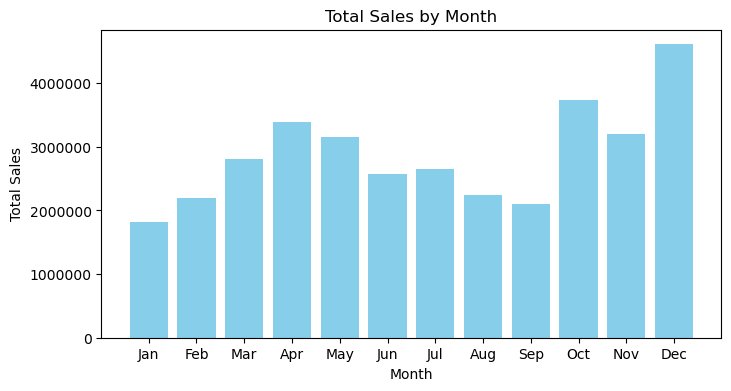

In [26]:
# plot

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.bar(monthly_earnings.index, monthly_earnings.values, color='skyblue')

# Add title and labels
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')

plt.xticks(monthly_earnings.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ticklabel_format(style='plain', axis='y')

### Which city sold the highest number of products?

In [27]:
# split purchase address column data into three new columns

merged[['Street','City','State']] = merged['Purchase Address'].str.split(',', expand=True)

In [28]:
sales_by_cities = merged.groupby('City').sum()
best_city = sales_by_cities.idxmax

sales_by_cities

,Order ID,Quantity Ordered,Price Each,Purchase Year,Purchase Month,Total Earnings
City,,,,,,
Atlanta,3.419485e+09,16584,2778608.69,30008397,104649,2794199.07
Austin,2.277506e+09,11137,1808340.03,19967912,69720,1818044.33
Boston,4.590961e+09,22494,3634398.40,40180123,140898,3658627.65
Dallas,3.410206e+09,16707,2750026.38,29875145,104447,2765373.96
Los Angeles,6.801454e+09,33247,5417171.70,59689717,208020,5448304.28
New York City,5.729940e+09,27903,4632920.54,50166103,175557,4661867.14
Portland,2.864927e+09,14037,2306588.80,25134533,87636,2319331.94
San Francisco,1.028721e+10,50169,8204001.38,90172590,314949,8254743.55
Seattle,3.402481e+09,16534,2730586.55,29705548,104817,2745046.02


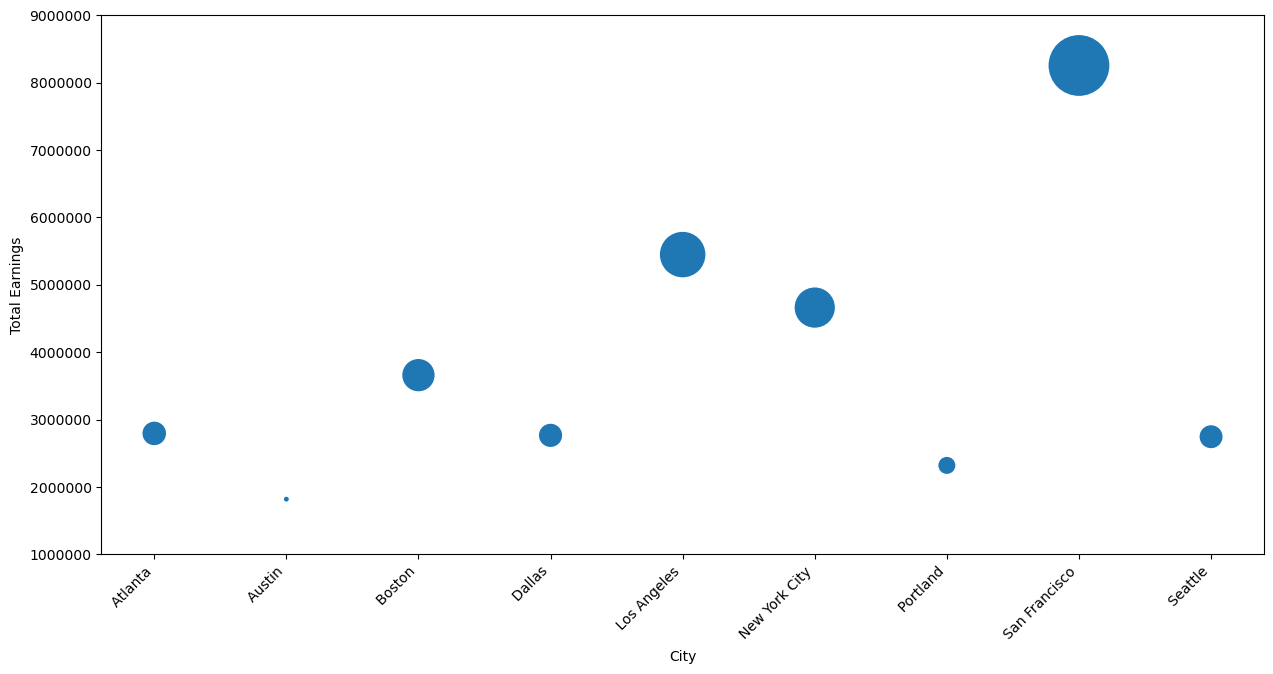

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 7))
sns.scatterplot(data=sales_by_cities, x='City', y='Total Earnings', size = 'Total Earnings', legend=False, sizes=(20, 2000))
plt.ticklabel_format(style='plain', axis='y')
plt.ylim(1000000, 9000000)
plt.xticks(rotation=45, ha='right')

# show the graph
plt.show()

### What is the best time interval to advertise products?

In [31]:
merged['Purchase Time'] = merged['Purchase Time'].astype(str)

In [32]:
# divide Purchase Time column into three

merged[['Hour','Minute','Second']] = merged['Purchase Time'].str.split(':', expand = True)

In [33]:
merged['Hour'] = merged['Hour'].astype(int)
merged['Minute'] = merged['Minute'].astype(int)

In [34]:
merged.drop(columns=['Second'], inplace=True)

In [35]:
merged

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Purchase Year,Purchase Month,Purchase Time,Total Earnings,Street,City,State,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,08:46:00,23.90,917 1st St,Dallas,TX 75001,8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,22:30:00,99.99,682 Chestnut St,Boston,MA 02215,22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,14:38:00,600.00,669 Spruce St,Los Angeles,CA 90001,14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,14:38:00,11.99,669 Spruce St,Los Angeles,CA 90001,14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,09:27:00,11.99,333 8th St,Los Angeles,CA 90001,9,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185682,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",2019,9,20:56:00,8.97,840 Highland St,Los Angeles,CA 90001,20,56
185683,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",2019,9,16:00:00,700.00,216 Dogwood St,San Francisco,CA 94016,16,0
185684,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",2019,9,07:39:00,700.00,220 12th St,San Francisco,CA 94016,7,39
185685,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",2019,9,17:30:00,379.99,511 Forest St,San Francisco,CA 94016,17,30


In [36]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 185686
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  int32         
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  int32         
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185686 non-null  object        
 6   Purchase Year     185686 non-null  int64         
 7   Purchase Month    185686 non-null  int64         
 8   Purchase Time     185686 non-null  object        
 9   Total Earnings    185686 non-null  float64       
 10  Street            185686 non-null  object        
 11  City              185686 non-null  object        
 12  State             185686 non-null  object        
 13  Hour              185686 non-null  int32         
 14  Minu

In [37]:
sales_by_time = merged.groupby('Hour').sum()
sales_by_time

,Order ID,Quantity Ordered,Price Each,Purchase Year,Purchase Month,Total Earnings,Minute
Hour,,,,,,,
0,8.988191e+08,4420,709124.09,7878150,27477,713548.66,103313
1,5.426587e+08,2616,458187.02,4738602,16643,460563.90,61699
2,2.822119e+08,1397,233821.65,2507602,8502,234839.45,32486
3,1.920593e+08,927,144711.47,1675773,5903,145742.94,23043
4,1.987600e+08,935,161943.24,1720192,6135,162546.07,26830
5,3.043017e+08,1492,229606.26,2665082,9298,230664.87,42872
6,5.718470e+08,2809,444850.12,5009139,17528,447963.01,80301
7,9.299595e+08,4547,739781.31,8080038,28787,744067.32,127128
8,1.433257e+09,6998,1185930.85,12622788,43605,1192309.20,198009


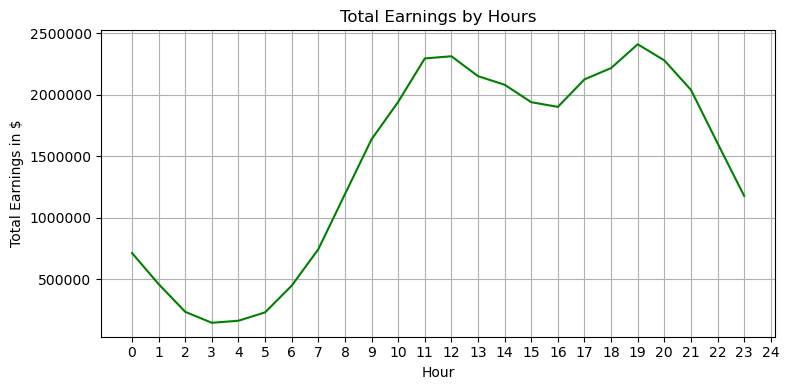

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.lineplot(data=sales_by_time, x='Hour', y='Total Earnings', color = 'green')

# Add labels and title
plt.xlabel('Hour')
plt.ylabel('Total Earnings in $')
plt.title('Total Earnings by Hours')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(range(0, 25, 1))
plt.grid(True)


# Show plot
plt.tight_layout()
plt.show()

### Which products were sold often together?

In [39]:
together_sold = merged[merged['Order ID'].duplicated(keep = False)]

together_sold['Grouped Products'] = together_sold.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

together_sold = together_sold[['Order ID','Grouped Products']].drop_duplicates()

together_sold.head(10)

C:\Users\TALIYEVA\AppData\Local\Temp\ipykernel_4740\699433898.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  together_sold['Grouped Products'] = together_sold.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped Products
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
30,176586,"AAA Batteries (4-pack),Google Phone"
117,176672,"Lightning Charging Cable,USB-C Charging Cable"
127,176681,"Apple Airpods Headphones,ThinkPad Laptop"
136,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
187,176739,"34in Ultrawide Monitor,Google Phone"
223,176774,"Lightning Charging Cable,USB-C Charging Cable"
231,176781,"iPhone,Lightning Charging Cable"
248,176797,"Google Phone,Bose SoundSport Headphones,Wired ..."


In [40]:
product_occurences = together_sold['Grouped Products'].value_counts()

# Show the most common product combinations
print(product_occurences.head(10))

iPhone,Lightning Charging Cable                       886
Google Phone,USB-C Charging Cable                     857
iPhone,Wired Headphones                               361
Vareebadd Phone,USB-C Charging Cable                  312
Google Phone,Wired Headphones                         303
iPhone,Apple Airpods Headphones                       286
Google Phone,Bose SoundSport Headphones               161
Vareebadd Phone,Wired Headphones                      104
Google Phone,USB-C Charging Cable,Wired Headphones     79
Vareebadd Phone,Bose SoundSport Headphones             60
Name: Grouped Products, dtype: int64


### Which product was sold the most? Why?

In [41]:
product_grouped = merged.groupby('Product')['Quantity Ordered'].sum()
product_grouped.sort_values(ascending = False)

Product
AAA Batteries (4-pack)        30986
AA Batteries (4-pack)         27615
USB-C Charging Cable          23931
Lightning Charging Cable      23169
Wired Headphones              20524
Apple Airpods Headphones      15637
Bose SoundSport Headphones    13430
27in FHD Monitor               7541
iPhone                         6847
27in 4K Gaming Monitor         6239
34in Ultrawide Monitor         6192
Google Phone                   5529
Flatscreen TV                  4813
Macbook Pro Laptop             4725
ThinkPad Laptop                4128
20in Monitor                   4126
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int32

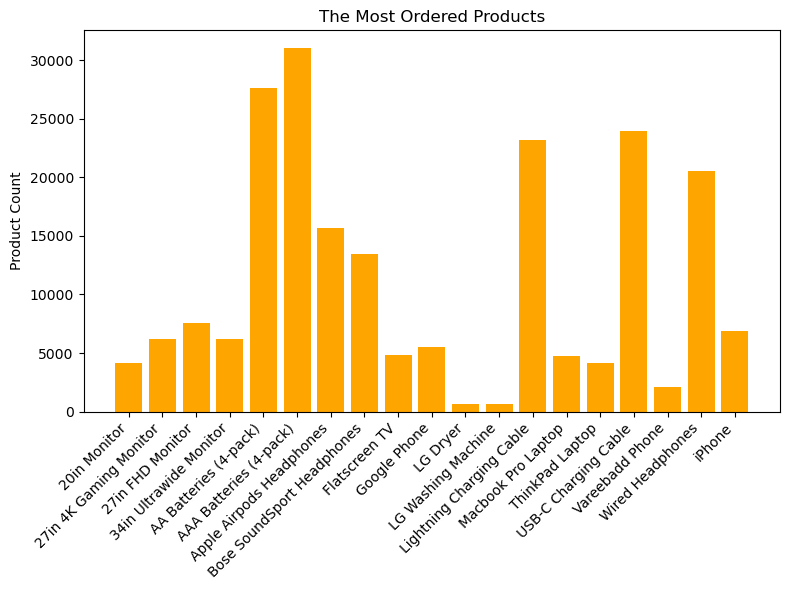

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

plt.bar(product_grouped.index, product_grouped.values, color='orange')

# Add labels and title
plt.ylabel('Product Count')
plt.title('The Most Ordered Products')
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

In [48]:
prices = merged.groupby('Product')['Price Each'].mean()
prices.sort_values(ascending = False)

Product
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
iPhone                         700.00
LG Dryer                       600.00
LG Washing Machine             600.00
Google Phone                   600.00
Vareebadd Phone                400.00
27in 4K Gaming Monitor         389.99
34in Ultrawide Monitor         379.99
Flatscreen TV                  300.00
Apple Airpods Headphones       150.00
27in FHD Monitor               149.99
20in Monitor                   109.99
Bose SoundSport Headphones      99.99
Lightning Charging Cable        14.95
Wired Headphones                11.99
USB-C Charging Cable            11.95
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Name: Price Each, dtype: float64

C:\Users\TALIYEVA\AppData\Local\Temp\ipykernel_4740\2274179186.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product_grouped.index, rotation = 45, ha='right')


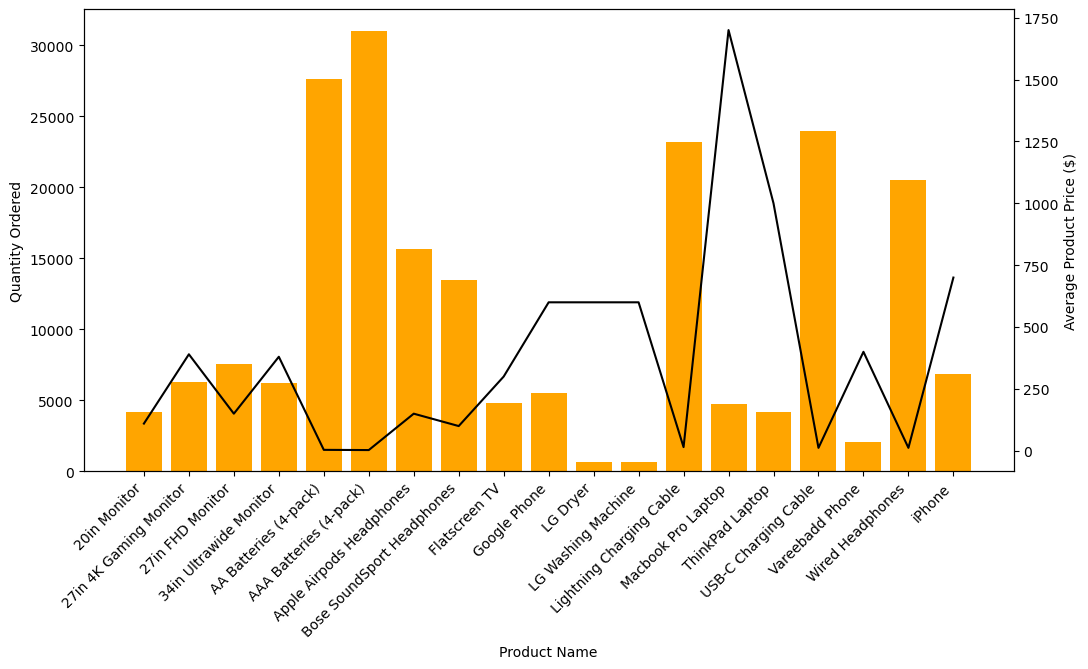

In [56]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 6))

ax2 = ax1.twinx()
ax1.bar(product_grouped.index, product_grouped.values, color='orange')
ax2.plot(product_grouped.index, prices, color = 'black')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered')
ax2.set_ylabel('Average Product Price ($)')
ax1.set_xticklabels(product_grouped.index, rotation = 45, ha='right')

plt.show()




